In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:/Users/AG30676/OneDrive - Anthem/Documents/Python Files/kc_house_data.csv')

In [3]:
df_dtypes = df.dtypes
print(df_dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [4]:
df_edit = df.drop(['id'], axis = 1)
df_edit = df_edit.describe()
print(df_edit)

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [5]:
df_floors = df['floors'].value_counts().to_frame()
print(df_floors)


     floors
1.0   10680
2.0    8241
1.5    1910
3.0     613
2.5     161
3.5       8


AxesSubplot(0.125,0.125;0.775x0.755)


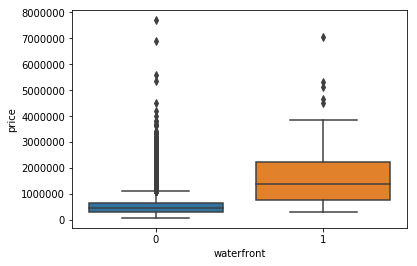

In [39]:
#boxplot creation
import seaborn as sns
df_boxplot = sns.boxplot(x = "waterfront", y = "price", data = df)
print(df_boxplot)

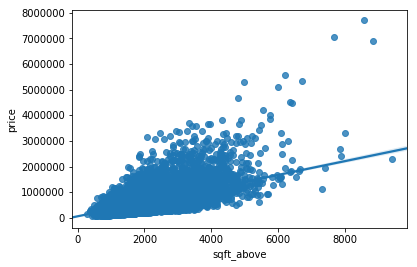

In [7]:
import seaborn as sns
df_regplot = sns.regplot(x = "sqft_above", y = "price", data = df)

In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
trainData, testData = train_test_split(df, train_size = 0.8, random_state = 3)
x=np.array(trainData['sqft_living']).reshape(-1,1)
y=np.array(trainData['price']).reshape(-1,1)
regressor = LinearRegression()
regressor.fit(x,y)

x_test = np.array(testData['sqft_living']).reshape(-1, 1)
y_test = np.array(testData['price']).reshape(-1, 1)
pred = regressor.predict(x_test)
print('linear model')
print('R squared Training', round(regressor.score(x, y), 3))
print('R squared Testing', round(regressor.score(x_test, y_test), 3))

linear model
('R squared Training', 0.492)
('R squared Testing', 0.496)


In [23]:
trainData, testData = train_test_split(df, train_size = 0.8, random_state = 3)
features1 = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement', 'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
regressor = LinearRegression()
regressor.fit(trainData[features1], trainData['price'])

pred = regressor.predict(testData[features1])
print('linear model')
print('R squared Training', round(regressor.score(trainData[features1], trainData['price']), 3))
print('R squared Testing', round(regressor.score(testData[features1], testData['price']), 3))

linear model
('R squared Training', 0.654)
('R squared Testing', 0.671)


In [27]:
#polynomial model building
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

polyfeat = PolynomialFeatures(degree = 2)
xtrain_poly = polyfeat.fit_transform(trainData[features1])
xtest_poly = polyfeat.fit_transform(testData[features1])

poly = LinearRegression()
poly.fit(xtrain_poly, trainData['price'])
polypred = poly.predict(xtest_poly)
print('1st polynomial regression model')
print('R-Squared (training)', round(poly.score(xtrain_poly, trainData['price']), 3))
print('R-Squared (testing)', round(poly.score(xtest_poly, testData['price']), 3))

1st polynomial regression model
('R-Squared (training)', 0.749)
('R-Squared (testing)', 0.757)


In [36]:
# Ridge Regression
from sklearn.linear_model import Ridge

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(trainData[features1], trainData['price'])
RidgeModel_pred = RidgeModel.predict(testData[features1])

print('1st Ridge Regression Model')
print('R-Squared (training)', round(RidgeModel.score(trainData[features1], trainData['price']), 3))
print('R-Squared (testing)', round(RidgeModel.score(testData[features1], testData['price']), 3))


1st Ridge Regression Model
('R-Squared (training)', 0.654)
('R-Squared (testing)', 0.671)


In [38]:
# Final Mixed Ridge/Polynomial Regression Model

polyfeat = PolynomialFeatures(degree = 2)
xtrain_poly = polyfeat.fit_transform(trainData[features1])
xtest_poly = polyfeat.fit_transform(testData[features1])

RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(xtrain_poly, trainData['price'])
RidgeModel_pred = RidgeModel.predict(xtest_poly)

print('1st Ridge Regression Model')
print('R-Squared (training)', round(RidgeModel.score(xtrain_poly, trainData['price']), 3))
print('R-Squared (testing)', round(RidgeModel.score(xtest_poly, testData['price']), 3))


1st Ridge Regression Model
('R-Squared (training)', 0.737)
('R-Squared (testing)', 0.745)
